Jupyter notebook to test out kNN-style classifier-based algorithm for trading, and compare to simple mean reversion and buy-hold trading strategies. Uses Kaggle dataset of S&P 500 stock data for three years up to Feb 2018. Throughout the notebook there will be adjustments made to the algorithm.

In [74]:
import numpy as np
import pandas as pd
import pylab as p

#Begin by processing data by appending sector data into the Kaggle data set for future use.

#import data from csv files and define a dictionary for sector lookup
stockdata = pd.read_csv(r'\Users\ragha\OneDrive\Desktop\all_stocks_5yr.csv')
sectordata_raw = pd.read_csv(r'\Users\ragha\OneDrive\Desktop\constituents_csv.csv')
#sector_dict = sectordata_raw[["Symbol", "Sector"]].to_dict()
sector_dict = dict(zip(sectordata_raw["Symbol"], sectordata_raw["Sector"]))
#print(sector_dict)
sector_lookups = np.vectorize(sector_dict.get)(stockdata["Name"])

In [75]:
#write method to calculate 30-day moving averages from input data and return as array
#end goal is to append this as a column in the stockdata df
#INPUT: df column containing all close data, size of input data
#OUTPUT: array containing newly calculated 30-day values
def calc30(data):
    tempdata = pd.Series(data)
    windowsize = 30
    windows = tempdata.rolling(windowsize)
    moving_avgs = windows.mean()
    moving_avgs.head(30)
    return(moving_avgs)
    
#write method to calculate 90-day moving averages from input data and return as array
#end goal is to append this as a column in the stockdata df
#INPUT: df column containing all close data, size of input data
#OUTPUT: array containing new calculated 90-day values
def calc90(data):
    tempdata = pd.Series(data)
    windowsize = 90
    windows = tempdata.rolling(windowsize)
    moving_avgs = windows.mean()
    moving_avgs.head(90)
    return(moving_avgs)

In [76]:
def plot_avgs(stockdata, ticker):
    dat = stockdata.loc[stockdata["Name"]  == ticker]
    p.figure()
    p.plot(dat["date"], dat["close"])
    p.plot(dat["date"], dat["30Day"])
    p.plot(dat["date"], dat["90Day"])
    p.xlabel("Date")
    p.ylabel("Price")
    p.show()

C:\Users\ragha\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\ragha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\ragha\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


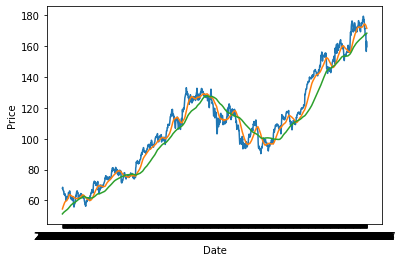

,date,open,high,low,close,volume,Name,Sector,30Day,90Day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,Industrials,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,Industrials,NaN,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,Industrials,NaN,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,Industrials,NaN,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,Industrials,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS,Health Care,75.069333,70.192444
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS,Health Care,75.202000,70.338111
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS,Health Care,75.239333,70.454778
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS,Health Care,75.272333,70.566556


In [77]:
stockdata["Sector"] = sector_lookups
stockdata["30Day"] = calc30(stockdata["close"])
stockdata["90Day"] = calc90(stockdata["close"])
plot_avgs(stockdata, "AAPL")
stockdata

In [78]:
stockdata.groupby('Name').head()

,date,open,high,low,close,volume,Name,Sector,30Day,90Day
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL,Industrials,NaN,NaN
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL,Industrials,NaN,NaN
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL,Industrials,NaN,NaN
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL,Industrials,NaN,NaN
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL,Industrials,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
617781,2013-02-08,32.31,33.48,32.30,33.05,2599232,ZTS,Health Care,52.051667,49.175667
617782,2013-02-11,33.06,33.50,32.88,33.26,1486115,ZTS,Health Care,51.470000,49.019889
617783,2013-02-12,33.40,34.00,33.15,33.74,1637279,ZTS,Health Care,50.883333,48.873333
617784,2013-02-13,33.80,33.80,33.00,33.55,1269625,ZTS,Health Care,50.307333,48.727333


In [81]:
stockdata.Sector.unique()

array(['Industrials', 'Information Technology', 'Consumer Discretionary',
       'Health Care', 'Consumer Staples', 'None', 'Utilities',
       'Financials', 'Materials', 'Real Estate', 'Energy',
       'Communication Services'], dtype=object)

In [83]:
stockdata = stockdata[stockdata['Sector'] == 'Information Technology']

In [84]:
#Fills in a dataframe for the closing stock price, which we will select for simplicity.
closedata = pd.DataFrame(index=stockdata['date'].unique(), columns=stockdata.Name.unique())
for ticker in closedata.columns:
    try:
        closedata[ticker] = stockdata[stockdata.Name==ticker].close.values
    except:
        print("Could not include ticker: " + ticker)
        pass
closedata

Could not include ticker: DXC
Could not include ticker: HPE
Could not include ticker: HPQ
Could not include ticker: ORCL
Could not include ticker: PYPL
Could not include ticker: QRVO


,AAPL,ACN,ADBE,ADI,ADP,ADSK,AKAM,AMAT,AMD,ANSS,...,SNPS,STX,SWKS,TEL,TXN,VRSN,V,WDC,WU,XLNX
2013-02-08,67.8542,73.31,39.12,45.70,60.925,38.89,35.42,13.61,2.59,74.69,...,34.40,35.48,23.93,40.52,34.28,45.39,39.4500,48.49,14.66,37.51
2013-02-11,68.5614,73.07,38.64,46.08,60.340,38.89,35.31,13.66,2.67,74.71,...,34.15,35.05,24.25,40.44,33.69,45.66,39.0825,48.60,14.25,37.46
2013-02-12,66.8428,73.37,38.89,46.27,60.360,38.91,36.74,13.66,2.77,75.74,...,34.44,34.68,24.20,40.49,33.56,45.53,39.2000,48.18,14.34,37.58
2013-02-13,66.7156,73.56,38.81,46.26,60.450,38.66,37.31,13.77,2.75,75.89,...,34.24,35.01,24.30,40.92,33.72,45.58,38.6925,48.63,14.17,37.80
2013-02-14,66.6556,73.13,38.61,46.54,60.740,38.67,37.87,13.89,2.75,75.51,...,34.33,34.95,24.97,41.08,33.79,45.67,38.9950,48.81,14.14,38.44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,167.7800,160.46,199.38,91.65,120.420,115.57,67.56,53.28,13.25,163.40,...,91.38,54.44,103.15,103.78,110.08,114.70,125.7200,87.65,20.69,72.49
2018-02-02,160.5000,156.90,195.64,89.11,118.570,111.64,65.72,50.68,12.45,160.29,...,90.16,51.77,98.96,102.18,107.66,112.51,120.9100,85.25,20.28,70.64
2018-02-05,156.4900,151.83,190.27,85.40,114.070,109.18,62.81,48.31,11.57,156.02,...,87.62,49.65,94.68,98.72,104.21,108.73,116.2700,81.45,19.54,66.97
2018-02-06,163.0300,154.69,194.47,88.54,112.950,112.62,63.67,50.25,11.65,157.10,...,87.45,48.68,104.56,99.14,105.87,109.41,119.9700,84.25,19.81,68.99


In [85]:
#Repeat above for 90day data, to compare vs buy and hold strat.
swmadata = pd.DataFrame(index=stockdata['date'].unique(), columns=stockdata.Name.unique())
for ticker in swmadata.columns:
    try:
        swmadata[ticker] = stockdata[stockdata.Name==ticker]['90Day'].values
    except:
        print("Could not include ticker: " + ticker)
        pass
swmadata.fillna(0)
swmadata_short = pd.DataFrame(index=stockdata['date'].unique(), columns=stockdata.Name.unique())
for ticker in swmadata.columns:
    try:
        swmadata_short[ticker] = stockdata[stockdata.Name==ticker]['30Day'].values
    except:
        print("Could not include ticker: " + ticker)
        pass
swmadata_short.fillna(0)

Could not include ticker: DXC
Could not include ticker: HPE
Could not include ticker: HPQ
Could not include ticker: ORCL
Could not include ticker: PYPL
Could not include ticker: QRVO
Could not include ticker: DXC
Could not include ticker: HPE
Could not include ticker: HPQ
Could not include ticker: ORCL
Could not include ticker: PYPL
Could not include ticker: QRVO


,AAPL,ACN,ADBE,ADI,ADP,ADSK,AKAM,AMAT,AMD,ANSS,...,SNPS,STX,SWKS,TEL,TXN,VRSN,V,WDC,WU,XLNX
2013-02-08,54.534140,60.206667,154.192667,186.145333,41.944167,116.260000,64.148000,117.956667,52.298333,112.324000,...,85.588667,102.633000,213.965000,284.493000,91.475333,95.674000,52.275667,74.105667,65.291333,45.491333
2013-02-11,55.072853,60.726667,150.370000,181.836000,42.614167,113.647667,63.217667,114.418667,50.664667,110.981000,...,83.885333,100.544333,207.240667,276.714000,89.552667,94.003667,51.802417,73.297000,63.663667,45.146667
2013-02-12,55.552280,61.257000,146.547333,177.526667,43.283833,111.034333,62.321333,110.865333,49.033000,109.660333,...,82.184000,98.426000,200.448000,268.871333,87.617667,92.306333,51.328083,72.471667,62.035000,44.796667
2013-02-13,56.041800,61.806667,142.738000,173.227333,43.962833,108.416667,61.455667,107.338000,47.420667,108.378667,...,80.479333,96.339333,193.639000,261.081333,85.692667,90.625667,50.853500,71.672000,60.400333,44.453000
2013-02-14,56.497320,62.284667,138.897000,168.855333,44.651167,105.839333,60.645667,103.666000,45.744333,107.070000,...,78.735667,94.280333,186.919333,253.280333,83.755333,88.953667,50.369000,70.800667,58.714667,44.140667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,173.409333,157.771333,187.972000,91.895667,119.260333,111.457333,66.010333,54.322667,11.930667,154.590000,...,89.449000,48.111500,98.601000,99.147000,110.001667,113.834667,119.293000,83.908000,20.179667,71.948333
2018-02-02,172.941333,157.927333,188.661000,91.934333,119.268000,111.665667,65.973667,54.246667,11.980667,155.012000,...,89.508667,48.431167,98.710333,99.356000,110.120333,113.733333,119.585333,83.941667,20.202667,71.976333
2018-02-05,172.346000,157.930000,189.195000,91.826000,119.141667,111.804000,65.846333,54.080667,12.000333,155.301000,...,89.526000,48.701833,98.618667,99.439000,110.100667,113.490667,119.723667,83.897667,20.205000,71.909000
2018-02-06,171.946667,157.946333,189.858667,91.822333,118.993333,112.077000,65.774000,54.026000,12.025667,155.630000,...,89.558333,48.925833,98.854333,99.559000,110.160667,113.331333,119.975667,84.011667,20.223333,71.929667


In [86]:
#Follow similar process above to store volume data -- might be interesting to include later on.
volumedata = pd.DataFrame(index=stockdata['date'].unique(), columns=stockdata.Name.unique())
for ticker in volumedata.columns:
    try:
        volumedata[ticker] = stockdata[stockdata.Name==ticker].volume.values
    except:
        print("Could not include ticker: " + ticker)
        pass
volumedata

Could not include ticker: DXC
Could not include ticker: HPE
Could not include ticker: HPQ
Could not include ticker: ORCL
Could not include ticker: PYPL
Could not include ticker: QRVO


,AAPL,ACN,ADBE,ADI,ADP,ADSK,AKAM,AMAT,AMD,ANSS,...,SNPS,STX,SWKS,TEL,TXN,VRSN,V,WDC,WU,XLNX
2013-02-08,158168416,2000477,5104545,2962576,1813162,1534449,7049683,16950482,5971768,130863,...,418979,10520558,2522548,1146224,13022820,2283318,12913800,2914011,7731572,3721016
2013-02-11,129029425,1880055,2333712,2382919,1366376,1368345,7253000,13240556,22410941,88425,...,419975,4311993,2387664,1056745,8274909,2530148,11032112,2358626,15484886,2004285
2013-02-12,151829363,1710274,3279424,2313512,1342315,1907926,9682277,11712555,13675442,199336,...,764855,3486369,2991270,876110,7055415,2058576,9805312,1644351,11962041,1859525
2013-02-13,118721995,1884631,2490936,2376089,1806080,1708966,6338839,11635605,11481985,239695,...,483096,3404630,2684874,1426745,5424613,2454228,13915520,1590441,23619015,2908631
2013-02-14,88809154,2096346,4929645,1991339,1704835,2525540,5145953,20124979,13283766,139296,...,844721,3537320,4413204,2091112,6394142,1775999,12760368,2032534,15849866,4376224
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-02-01,47230787,1692576,2366120,2312175,2555727,1596444,1440142,9706003,67543333,641201,...,1115001,5356395,5172360,1939346,5828150,860431,11169657,3555220,6318715,3935212
2018-02-02,86593825,2183611,2813785,2922619,2903751,1808333,1650847,16813121,79432558,379979,...,1017540,6567155,3767699,2801881,7474446,860163,13937710,5010389,6520662,2935363
2018-02-05,72738522,3733711,3801346,3817435,2903833,2890782,2148223,17999698,116568862,618978,...,1487986,7359006,5451830,2188977,8460397,1011241,16623914,5205198,5493227,3952117
2018-02-06,68243838,4259634,4479960,5440793,3379949,3144823,3249136,21455699,87123202,589594,...,1815740,9556611,8628644,3189465,9266882,1171603,19053339,4835812,7243019,5438944


In [87]:
#We will test the method of k-nearest on AAPL stock in the Technology sector.
#Signals are simply defined on absolute change in price:
# IF stock is up 2%, we buy (i.e. label is -1).
# If stock is down 2%, we sell (i.e. label is 1).
# Else, the label is zero.
# We can define other signals here based on the deviation from moving avgs as comparison.
# For PnL calculation, add a transaction cost (5c) -- with later classifiers, incorporate into the loss function.
# Selecting negatively correlated assets, we will assign labels inverse as needed.

ticker = "AAPL"
correls = closedata.corr(method='pearson')
maxcorrs = correls['AAPL'][np.argsort(correls['AAPL'])][-4:-1]
mincorrs = correls['AAPL'][np.argsort(correls['AAPL'])][:3]
print(maxcorrs)
print(mincorrs)

SWKS    0.937963
APH     0.939059
TEL     0.942580
Name: AAPL, dtype: float64
IBM    -0.606435
QCOM   -0.339429
STX    -0.035786
Name: AAPL, dtype: float64


In [88]:
corrcloses = closedata[maxcorrs.index]
for i in range(len(corrcloses.columns)):
    corrcloses[str(i+1)] = corrcloses[corrcloses.columns[i]].pct_change().round(5)*100
corrcloses.fillna(0)
corrcloses.head(25)

C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,SWKS,APH,TEL,1,2,3
2013-02-08,23.93,35.220,40.52,NaN,NaN,NaN
2013-02-11,24.25,35.205,40.44,1.337,-0.043,-0.197
2013-02-12,24.20,35.200,40.49,-0.206,-0.014,0.124
2013-02-13,24.30,35.055,40.92,0.413,-0.412,1.062
2013-02-14,24.97,35.050,41.08,2.757,-0.014,0.391
2013-02-15,24.50,35.210,41.03,-1.882,0.456,-0.122
2013-02-19,24.54,35.445,41.30,0.163,0.667,0.658
2013-02-20,23.62,34.745,40.96,-3.749,-1.975,-0.823
2013-02-21,21.16,34.640,40.48,-10.415,-0.302,-1.172
2013-02-22,21.85,35.400,41.01,3.261,2.194,1.309


In [89]:
#print(np.where(corrcloses['1'] > 2.5, 1, np.where(corrcloses['1'] < -2.5, -1, 0))[:25])
corrcloses['Action'] = -1*np.around((np.where(corrcloses['1'] > 2.5, 1, np.where(corrcloses['1'] < -2.5, -1, 0))+ \
      np.where(corrcloses['2'] > 2.5, 1, np.where(corrcloses['2'] < -2.5, -1, 0)) + \
      np.where(corrcloses['3'] > 2.5, 1, np.where(corrcloses['3'] < -2.5, -1, 0)))/3, 0)

C:\Users\ragha\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [90]:
corrcloses

,SWKS,APH,TEL,1,2,3,Action
2013-02-08,23.93,35.220,40.52,NaN,NaN,NaN,-0.0
2013-02-11,24.25,35.205,40.44,1.337,-0.043,-0.197,-0.0
2013-02-12,24.20,35.200,40.49,-0.206,-0.014,0.124,-0.0
2013-02-13,24.30,35.055,40.92,0.413,-0.412,1.062,-0.0
2013-02-14,24.97,35.050,41.08,2.757,-0.014,0.391,-0.0
...,...,...,...,...,...,...,...
2018-02-01,103.15,92.820,103.78,6.110,0.054,1.219,-0.0
2018-02-02,98.96,91.250,102.18,-4.062,-1.691,-1.542,0.0
2018-02-05,94.68,88.410,98.72,-4.325,-3.112,-3.386,1.0
2018-02-06,104.56,88.560,99.14,10.435,0.170,0.425,-0.0


In [91]:
#For now, we skip the negative correlations and backtest trading on this simple signal.

pnl = -1*np.dot(corrcloses['Action'], closedata['AAPL'])
position = np.sum(corrcloses['Action'])
print("kNN signal PnL: ", pnl)
print("Net Position: ", position)
# testing = pd.DataFrame(data=zip(corrcloses['Action'], closedata['AAPL']), columns=['Action', 'Price'])
# testing['3'] = testing['Action']*testing['Price']
# print(testing[testing['Action'] !=0])

kNN signal PnL:  -1415.3884
Net Position:  13.0


In [92]:
#Comparison to 90day strat:
action_swma = np.concatenate((np.zeros(1), np.diff(np.where(swmadata_short['AAPL'].values > swmadata['AAPL'], 1, 0))))
# print(action_swma[np.nonzero(action_swma)])
# print(np.multiply(-1*action_swma, closedata['AAPL']))
pnl_avg = -1*np.dot(action_swma, closedata['AAPL'])
position_avg = np.sum(action_swma)
print("Moving Avg PnL: ", pnl_avg)
print("Net Position: ", position_avg)

Moving Avg PnL:  -42.25569999999999
Net Position:  0.0


### TODO: adapt order size/define sharper trading signals; add mincorr assets; compare to other statistical methods (?)